###Clustering Businesses

In [1]:
import os
import csv
import re

business_csv_file = open(os.path.join("..","data","biz_csv","business.csv"),"r", encoding='utf-8')
business_csv = csv.reader(business_csv_file)

categories = list()
for line in business_csv:
    #print(line)
    categories.append(line[-1])
categories = categories[1:]

business_csv_file.close()

unique_cats = set()
for category in categories:
    cat_list = re.split(",|&",category)
    for cat in cat_list:
        cat = cat.lower().strip()
        if len(cat) > 0:
            unique_cats.add(cat.lower().strip())

print("There are "+str(len(unique_cats))+" unique categories and subcategories for all businesses")

There are 1310 unique categories and subcategories for all businesses


In [1]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import csv
import pandas


# business_csv_file = open(os.path.join("..","data","biz_csv","business.csv"),"r", encoding="utf8")
# business_csv = csv.reader(business_csv_file)

def cluster_by_category(latlon_cluster_no, data, n_clusters):
    categories = list()
    for line in data:
        categories.append(line[-1])
        
    vectorizer = TfidfVectorizer(stop_words='english') #,token_pattern='[a-zA-Z0-9\s&]+' # term-frequency x inverse-document frequency
    # tokenize based on comma instead of space. Otherwise, words like "Public Services" will not be seen as a single word 
    # by the vectorizer
    cat = vectorizer.fit_transform(categories)

    kmeans_model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1,random_state=1)
    kmeans_model.fit(cat)

    business_csv_clustered_file = open(os.path.join("..","data","biz_csv","business_clustered.csv"),"a+", newline='', encoding='utf8')
    business_clustered_csv = csv.writer(business_csv_clustered_file)

    for line in data:
        if not (line[-1] == "categories"):
            pred = kmeans_model.predict(vectorizer.transform(line[-1:]))
            line.extend([pred[0],latlon_cluster_no])
            business_clustered_csv.writerow(line)

    business_csv_clustered_file.close()

In [3]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import csv
import pandas

def cluster_by_position_and_category(n_clusters):
    business_csv_file = open(os.path.join("..","data","biz_csv","business.csv"),"r", encoding="utf8")
    business_csv = csv.reader(business_csv_file)

    categories = list()
    first_line = 1;
    for line in business_csv:
        if first_line > 1:
            categories.append([float(line[1]), float(line[2])])
        else:
            categories.append([line[1], line[2]])
        first_line += 1
    categories = categories[1:]
    #biz_train, biz_test =  get_cross_validated_data(splits=2,repeats=2)

    kmeans_model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1,random_state=1)
    kmeans_model.fit(categories)
    print("Clustering based on location (latitude and longitude)...")
    business_csv_file.close()

    business_csv_file = open(os.path.join("..","data","biz_csv","business.csv"),"r", encoding="utf8")
    business_csv = csv.reader(business_csv_file)

    cluster_buckets = dict()

    for line in business_csv:
        if not (line[-1] == "categories"):
            pred = kmeans_model.predict([[line[1],line[2]]])[0]
            if not pred in cluster_buckets: 
                cluster_buckets[pred] = list()
            cluster_buckets[pred].append(line)

    business_csv_file.close()
    print("Clustering based on location (latitude and longitude)... DONE")
    print("Clustering each location based clusters based on the business category...")
    for cluster in cluster_buckets:
        print("Processing locational cluster number "+str(cluster))
        cluster_by_category(latlon_cluster_no=cluster, data=cluster_buckets[cluster], n_clusters=min(len(cluster_buckets[cluster]),n_clusters))

    print("Clustering each location based clusters based on the business category... DONE")

In [5]:
cluster_by_position_and_category(20)

Clustering based on location (latitude and longitude)...
Clustering based on location (latitude and longitude)... DONE
Clustering each location based clusters based on the business category...
Processing locational cluster number 16
Processing locational cluster number 6
Processing locational cluster number 5
Processing locational cluster number 4
Processing locational cluster number 10
Processing locational cluster number 19
Processing locational cluster number 17
Processing locational cluster number 1
Processing locational cluster number 2
Processing locational cluster number 8
Processing locational cluster number 7
Processing locational cluster number 11
Processing locational cluster number 3
Processing locational cluster number 0
Processing locational cluster number 15
Processing locational cluster number 9
Processing locational cluster number 18
Processing locational cluster number 12
Processing locational cluster number 13
Processing locational cluster number 14
Clustering each l

In [5]:
#cross-validation 50-25-25 over this business.csv (cluster only 50% data)
#do the regression, training the check-in data over 50% data. --> in RAM! 
#for each validation data, we will find the cluster and then filter businesses fromm the same cluster
#take check-in data for those check-in businesses and learn to predict the crowd

In [1]:
from sklearn.model_selection import RepeatedKFold

def get_cross_validated_data(splits,repeats):
    business_df = pd.read_csv(os.path.join("data", "biz_csv", 'business.csv'))
    print(business_df)
    training_data = list()
    test_data=list()
    rkfold = RepeatedKFold(n_splits=splits, n_repeats=repeats, random_state=1)
    for train, test in rkfold.split(business_df):
        training_data.append(business_df.values[train])
        test_data.append(business_df.values[test])
    return training_data, test_data
    

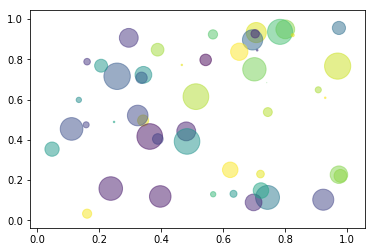

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [ ]:
# take all the data and cluster it.
# when a new business comes in, take longitude and lattitude and get cluster number
# skim thru the categories to find the category_cluster. 

# Anand = return train,test --> train will have 75% train and 25% test i.e. list of business_ids
# 1. Manva will do a regression model over ann. 2. get the list of training business_id and fit annRegressor. 
# 3. get one business_id and get a list of checkins and run the ann model over it. 
# 4. I will get predicted_check_in_value and compare it with true_checkin_value. Calculate accuracy.